In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from keras import models, layers, regularizers

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [132]:
path = "../Bloomberg_data_processing/"
filename = "preprocessed_russell_3k_data_14-03-22.csv"

data = pd.read_csv(path + filename)

In [133]:
data.head(5)

,Ticker,Nom,SUB_IND_GICS,IND_GICS,REGION_NAME,CUR_MKT_CAP,CURR_ENTP_VAL,NET_INCOME_FIRM,SALES_REV_TURN,NET_REV,...,CURRENT_EV_TO_T12M_EBIT,CURRENT_EV_TO_T12M_EBITDA,PX_TO_SALES_RATIO,TRAIL_12M_NET_SALES,CURRENT_EV_TO_12M_SALES,PE_RATIO,NUM_OF_EMPLOYEES,SUSTAIN_GROWTH_RT,PROF_MARGIN,Unnamed: 23
0,AA,Alcoa Corp,Aluminum,Materials,United States,1.369201e+10,15267.809120,521.702252,12152.000000,NaN,...,15.982783,9.071782,1.128767,12152.000000,1.256403,12.379874,12200.0,NaN,3.530283,NaN
1,INO,Inovio Pharmaceuticals Inc,Biotechnology,Health Care,United States,6.880814e+08,319.789847,NaN,1.774758,NaN,...,NaN,NaN,374.061876,1.774758,180.187861,NaN,317.0,NaN,-17109.865680,NaN
2,AXP,American Express Co,Consumer Finance,Financials,United States,1.317860e+11,150676.059200,NaN,43663.000000,42380.0,...,14.096366,11.024809,3.132584,43663.000000,3.450887,17.372373,64000.0,28.287234,18.459565,NaN
3,VZ,Verizon Communications Inc,Integrated Telecommunication Services,Communication Services,United States,2.208480e+11,397266.502900,24744.256630,133613.000000,NaN,...,11.965686,7.396647,1.633210,133613.000000,2.973262,9.715623,118400.0,12.442155,16.514112,NaN
4,SPWH,Sportsman's Warehouse Holdings Inc,Specialty Stores,Consumer Discretionary,United States,4.945274e+08,820.834420,94.017727,1451.767000,NaN,...,7.683198,3.680921,0.322762,1527.979000,0.537203,5.769245,7000.0,37.138918,6.294398,NaN


In [59]:
# le = preprocessing.LabelEncoder()
# data["IND_GICS"] = le.fit_transform(data["IND_GICS"])

# le = preprocessing.LabelEncoder()
# data["SUB_IND_GICS"] = le.fit_transform(data["SUB_IND_GICS"])

In [134]:
data.dtypes

Ticker                        object
Nom                           object
SUB_IND_GICS                  object
IND_GICS                      object
REGION_NAME                   object
CUR_MKT_CAP                  float64
CURR_ENTP_VAL                float64
NET_INCOME_FIRM              float64
SALES_REV_TURN               float64
NET_REV                      float64
GROSS_PROFIT                 float64
EBIT                         float64
EBITDA                       float64
NET_DEBT                     float64
CURRENT_EV_TO_T12M_EBIT      float64
CURRENT_EV_TO_T12M_EBITDA    float64
PX_TO_SALES_RATIO            float64
TRAIL_12M_NET_SALES          float64
CURRENT_EV_TO_12M_SALES      float64
PE_RATIO                     float64
NUM_OF_EMPLOYEES             float64
SUSTAIN_GROWTH_RT            float64
PROF_MARGIN                  float64
Unnamed: 23                  float64
dtype: object

In [136]:
data = data.drop(columns=["Ticker", "Nom", "Unnamed: 23", "CURRENT_EV_TO_T12M_EBIT", "CURRENT_EV_TO_T12M_EBITDA", 'CURRENT_EV_TO_12M_SALES'])
data = data.dropna(subset=['CURR_ENTP_VAL'])

In [137]:
one_hot1 = pd.get_dummies(data["IND_GICS"])
data = data.drop("IND_GICS", axis=1)

one_hot2 = pd.get_dummies(data["SUB_IND_GICS"])
data = data.drop("SUB_IND_GICS", axis=1)

one_hot3 = pd.get_dummies(data["REGION_NAME"])
data = data.drop("REGION_NAME", axis=1)

columns_to_scale = data.columns.values.tolist()

data = data.join(one_hot1)
data = data.join(one_hot2)
data = data.join(one_hot3)

In [138]:
data.head(5)

,CUR_MKT_CAP,CURR_ENTP_VAL,NET_INCOME_FIRM,SALES_REV_TURN,NET_REV,GROSS_PROFIT,EBIT,EBITDA,NET_DEBT,PX_TO_SALES_RATIO,...,Panama,Peru,Puerto Rico,Singapore,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
0,1.369201e+10,15267.809120,521.702252,12152.000000,NaN,2999.000,949.000000,1683.000000,12.000000,1.128767,...,0,0,0,0,0,0,0,0,1,0
1,6.880814e+08,319.789847,NaN,1.774758,NaN,NaN,-301.217919,-294.257408,-368.291556,374.061876,...,0,0,0,0,0,0,0,0,1,0
2,1.317860e+11,150676.059200,NaN,43663.000000,42380.0,NaN,11972.000000,13667.000000,18890.000000,3.132584,...,0,0,0,0,0,0,0,0,1,0
3,2.208480e+11,397266.502900,24744.256630,133613.000000,NaN,77312.000,32448.000000,53709.000000,175009.000000,1.633210,...,0,0,0,0,0,0,0,0,1,0
4,4.945274e+08,820.834420,94.017727,1451.767000,NaN,476.454,122.748000,212.589000,198.785000,0.322762,...,0,0,0,0,0,0,0,0,1,0


In [139]:
X = data.drop(columns= ["CURR_ENTP_VAL"])
y = data["CURR_ENTP_VAL"]

In [140]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, random_state=1)

In [141]:
scaler = StandardScaler()
columns_to_scale.remove("CURR_ENTP_VAL")
train_X[columns_to_scale] = scaler.fit_transform(train_X[columns_to_scale])
test_X[columns_to_scale] = scaler.transform(test_X[columns_to_scale])

In [142]:
train_X.describe()

,CUR_MKT_CAP,NET_INCOME_FIRM,SALES_REV_TURN,NET_REV,GROSS_PROFIT,EBIT,EBITDA,NET_DEBT,PX_TO_SALES_RATIO,TRAIL_12M_NET_SALES,...,Panama,Peru,Puerto Rico,Singapore,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
count,1.962000e+03,8.710000e+02,1.943000e+03,6.900000e+01,1.534000e+03,1.907000e+03,1.885000e+03,1.957000e+03,1.817000e+03,1.910000e+03,...,1962.000000,1962.000000,1962.0,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.0
mean,-1.086457e-17,1.937473e-17,-1.097081e-17,3.861645e-17,-8.105931e-18,-1.397239e-17,1.884729e-18,5.446163e-18,9.776317e-18,2.046065e-17,...,0.000510,0.000510,0.0,0.000510,0.000510,0.001529,0.000510,0.005097,0.968400,0.0
std,1.000255e+00,1.000575e+00,1.000257e+00,1.007326e+00,1.000326e+00,1.000262e+00,1.000265e+00,1.000256e+00,1.000275e+00,1.000262e+00,...,0.022576,0.022576,0.0,0.022576,0.022576,0.039083,0.022576,0.071228,0.174978,0.0
min,-1.913119e-01,-7.294713e-01,-2.519526e-01,-4.568806e-01,-3.335202e-01,-1.691683e+00,-9.867668e-01,-3.041067e+01,-4.690763e-02,-2.552224e-01,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-1.833938e-01,-2.566835e-01,-2.397583e-01,-4.036352e-01,-2.357496e-01,-1.994811e-01,-2.249277e-01,-1.623629e-01,-4.546404e-02,-2.427133e-01,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,-1.649739e-01,-2.214594e-01,-2.084343e-01,-3.299391e-01,-2.051633e-01,-1.760272e-01,-1.959263e-01,-1.377849e-01,-4.355683e-02,-2.112708e-01,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,-1.056166e-01,-1.018159e-01,-1.053118e-01,-1.461972e-01,-1.065697e-01,-9.492406e-02,-1.030904e-01,-2.086488e-02,-3.878162e-02,-1.060307e-01,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,2.350957e+01,1.512802e+01,2.091242e+01,6.248205e+00,1.745531e+01,2.407539e+01,2.057067e+01,1.324652e+01,4.121209e+01,2.058628e+01,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [143]:
scaler_y = StandardScaler()
train_y = pd.DataFrame(train_y)
test_y = pd.DataFrame(test_y)
train_y = scaler_y.fit_transform(train_y)
test_y = scaler_y.transform(test_y)

In [144]:
print("train_X NaN values:")
print(train_X.isnull().sum())

print("\ntest_X NaN values:")
print(test_X.isnull().sum())

train_X NaN values:
CUR_MKT_CAP           0
NET_INCOME_FIRM    1091
SALES_REV_TURN       19
NET_REV            1893
GROSS_PROFIT        428
                   ... 
Switzerland           0
Thailand              0
United Kingdom        0
United States         0
Uruguay               0
Length: 204, dtype: int64

test_X NaN values:
CUR_MKT_CAP          0
NET_INCOME_FIRM    482
SALES_REV_TURN       9
NET_REV            810
GROSS_PROFIT       176
                  ... 
Switzerland          0
Thailand             0
United Kingdom       0
United States        0
Uruguay              0
Length: 204, dtype: int64


In [145]:
train_X = train_X.fillna(0)
test_X = test_X.fillna(0)

In [146]:
print("train_X NaN values:")
print(train_X.isnull().sum())

print("\ntest_X NaN values:")
print(test_X.isnull().sum())

train_X NaN values:
CUR_MKT_CAP        0
NET_INCOME_FIRM    0
SALES_REV_TURN     0
NET_REV            0
GROSS_PROFIT       0
                  ..
Switzerland        0
Thailand           0
United Kingdom     0
United States      0
Uruguay            0
Length: 204, dtype: int64

test_X NaN values:
CUR_MKT_CAP        0
NET_INCOME_FIRM    0
SALES_REV_TURN     0
NET_REV            0
GROSS_PROFIT       0
                  ..
Switzerland        0
Thailand           0
United Kingdom     0
United States      0
Uruguay            0
Length: 204, dtype: int64


In [147]:
train_X = train_X.values
test_X = test_X.values

### Model

In [148]:
linear_reg = models.Sequential()

linear_reg.add(layers.Dense(1))

In [149]:
linear_reg.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])

In [150]:
# history1 = linear_reg.fit(train_X, train_y, epochs=200, verbose=0, validation_data=(test_X, test_y))
history1 = linear_reg.fit(train_X, train_y, epochs=200, verbose=0, validation_split=0.2)

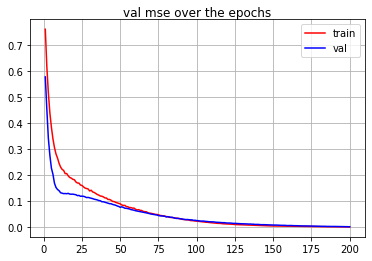

In [151]:
metric = "mse"
epochs = range(1, (len(history1.history[metric]) + 1))

plt.plot(epochs, history1.history[metric], label="train", color="r")
plt.plot(epochs, history1.history[f"val_{metric}"], label="val", color="b")
plt.title(f"val {metric} over the epochs", pad=-50)
plt.legend()
plt.grid()
plt.show()

In [77]:
test_results={}
test_results['linear_model'] = linear_reg.evaluate(test_X, test_y, verbose=0)[0]

In [78]:
# model.compile(loss="mean_square_error", optimizer="adam", metrics=["mse"])

In [79]:
test_results

{'linear_model': 0.007679871283471584}

In [80]:
print(linear_reg.metrics_names)

['loss', 'mse', 'mae']


In [81]:
pd.DataFrame(test_results, index=['Mean square error [MPG]'])

,linear_model
Mean square error [MPG],0.00768


In [82]:
test_prediction = linear_reg.predict(test_X)
descaled_test_pred = scaler_y.inverse_transform(test_prediction)

In [83]:
descaled_y = scaler_y.inverse_transform(test_y)

In [86]:
def mean(ev):
    mean = 0
    for i in range(len(ev)):
        mean +=ev[i]
    return mean/len(ev)

In [87]:
print(mean(descaled_y))

[17172.83817377]


In [88]:
def mse(y, pred_y):
    sum = 0
    for i in range(len(y)):
        sum += (y[i] - pred_y[i])**2
    return sum/len(y)

def mae(y, pred_y):
    sum = 0
    for i in range(len(y)):
        sum += abs(y[i] - pred_y[i])
    return sum/len(y)

In [89]:
mse_test_pred = mse(test_y, test_prediction)
descaled_mse_test_pred = mse(descaled_y, descaled_test_pred)
mae_test_pred = mae(test_y, test_prediction)
descaled_mae_test_pred = mae(descaled_y, descaled_test_pred)

In [90]:
print(mse_test_pred)
print(descaled_mse_test_pred)

print(mae_test_pred)
print(descaled_mae_test_pred)

[0.00767988]
[58632856.11019869]
[0.01448702]
[1265.82127555]


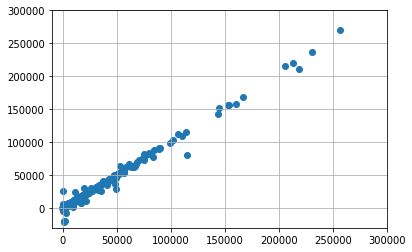

In [101]:
plt.scatter(descaled_y, descaled_test_pred)
plt.axis([-10000, 0.3e6, -30000, 0.3e6])
plt.grid()

model 2

In [125]:
model = models.Sequential()

model.add(layers.Dense(20, activation="relu", input_shape=(207,)))
model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dense(1))

In [126]:
model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])

In [127]:
history2 = model.fit(train_X, train_y, epochs=200, verbose=0, validation_split=0.2, batch_size=16)

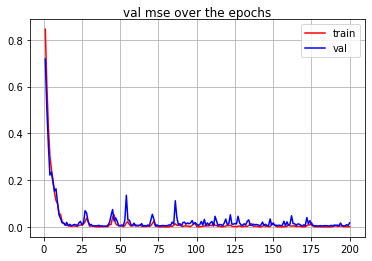

In [128]:
metric = "mse"
epochs = range(1, (len(history2.history[metric]) + 1))

plt.plot(epochs, history2.history[metric], label="train", color="r")
plt.plot(epochs, history2.history[f"val_{metric}"], label="val", color="b")
plt.title(f"val {metric} over the epochs", pad=-50)
plt.legend()
plt.grid()
plt.show()

In [129]:
test_results['DL_model'] = model.evaluate(test_X, test_y, verbose=0)[0]

In [130]:
test_results

{'linear_model': 0.007679871283471584, 'DL_model': 0.014027216471731663}

In [ ]:
test_prediction = model.predict(test_X)
descaled_test_pred = scaler_y.inverse_transform(test_prediction)

In [ ]:
descaled_y = scaler_y.inverse_transform(test_y)

In [ ]:
print(mean(descaled_y))

In [ ]:
mse_test_pred = mse(test_y, test_prediction)
descaled_mse_test_pred = mse(descaled_y, descaled_test_pred)
mae_test_pred = mae(test_y, test_prediction)
descaled_mae_test_pred = mae(descaled_y, descaled_test_pred)

In [ ]:
print(mse_test_pred)
print(descaled_mse_test_pred)

print(mae_test_pred)
print(descaled_mae_test_pred)

In [ ]:
plt.scatter(descaled_y, descaled_test_pred)
plt.axis([-10000, 0.3e6, -30000, 0.3e6])
plt.grid()